# Exercise 6.3

**Steps 1-4:**

In [2]:
# Create a new Jupyter notebook for conducting geospatial analysis and import the libraries you need.

import pandas as pd
import numpy as np
import os
import seaborn as sns
import json
import folium
import matplotlib

In [5]:
# Find a JSON/GeoJSONfile containing location data that corresponds to the location data in your student project data.
geo = pd.read_json(os.path.join(path, 'Data', 'custom_geo.json'))

In [6]:
%matplotlib inline

In [7]:
path = r'C:/Users/javed/Achievement 6'

In [8]:
f = open(r'C:/Users/javed/Achievement 6/Data/custom_geo.json')

In [9]:
data = json.load(f)

In [10]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'scalerank': 1,
    'featurecla': 'Admin-0 country',
    'labelrank': 4,
    'sovereignt': 'The Bahamas',
    'sov_a3': 'BHS',
    'adm0_dif': 0,
    'level': 2,
    'type': 'Sovereign country',
    'admin': 'The Bahamas',
    'adm0_a3': 'BHS',
    'geou_dif': 0,
    'geounit': 'The Bahamas',
    'gu_a3': 'BHS',
    'su_dif': 0,
    'subunit': 'The Bahamas',
    'su_a3': 'BHS',
    'brk_diff': 0,
    'name': 'Bahamas',
    'name_long': 'Bahamas',
    'brk_a3': 'BHS',
    'brk_name': 'Bahamas',
    'brk_group': None,
    'abbrev': 'Bhs.',
    'postal': 'BS',
    'formal_en': 'Commonwealth of the Bahamas',
    'formal_fr': None,
    'note_adm0': None,
    'note_brk': None,
    'name_sort': 'Bahamas, The',
    'name_alt': None,
    'mapcolor7': 1,
    'mapcolor8': 1,
    'mapcolor9': 2,
    'mapcolor13': 5,
    'pop_est': 309156,
    'gdp_md_est': 9093,
    'pop_year': -99,
    'lastcensus': 2010,
    'gdp_y

In [11]:
# Importing dataset:
df = pd.read_excel(os.path.join(path, 'Data', 'ac6_dataset.xlsx'), index_col = False)

In [12]:
df.columns

Index(['Date Reported', 'Country Code', 'Country', 'New Cases',
       'Cumulative Cases', 'New Deaths', 'Cumulative Deaths'],
      dtype='object')

In [13]:
columns = ['Date Reported','Country', 'New Cases', 'Cumulative Cases', 'New Deaths', 'Cumulative Deaths']

In [14]:
# Creating a subset

subset = df[columns]

In [15]:
subset.head()

,Date Reported,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
0,2021-11-23,United States of America,61596,47434791,428,767278
1,2021-11-22,United States of America,115925,47373195,1840,766850
2,2021-11-20,United States of America,120516,47257270,3911,765010
3,2021-11-21,United States of America,0,47257270,0,765010
4,2021-11-19,United States of America,105962,47136754,1711,761099


**Steps 5-8:**

In [16]:
#5. Wrangle your project data to meet the needs of your analysis.


**Checking for Missing Values:**

In [17]:
subset.isnull().sum()

Date Reported        0
Country              0
New Cases            0
Cumulative Cases     0
New Deaths           0
Cumulative Deaths    0
dtype: int64

No missing values were found.

**Checking for Duplicates:**

In [18]:
dups = subset.duplicated()

In [19]:
dups.shape

(163076,)

No duplicates were found.

**Checking for Extreme Values:**

<AxesSubplot:xlabel='New Cases', ylabel='Count'>

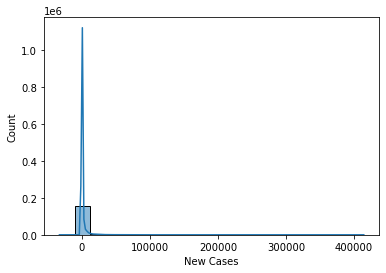

In [20]:
sns.histplot(subset['New Cases'], bins=20, kde = True)

In [21]:
subset[subset['New Cases'] > 100000]

,Date Reported,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
1,2021-11-22,United States of America,115925,47373195,1840,766850
2,2021-11-20,United States of America,120516,47257270,3911,765010
4,2021-11-19,United States of America,105962,47136754,1711,761099
6,2021-11-17,United States of America,151953,46932468,1157,757821
9,2021-11-14,United States of America,128589,46698732,1896,756104
...,...,...,...,...,...,...
1681,2021-04-10,India,145384,13205926,794,168436
1687,2021-04-09,India,131968,13060542,780,167642
1691,2021-04-08,India,126789,12928574,685,166862
1697,2021-04-07,India,115736,12801785,630,166177


There are 233 rows of data that record more than 100,000 new cases in one day. 

In [22]:
subset[subset['New Cases'] > 500000]

,Date Reported,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths


There is no record of data for 500,000 or more deaths. This would be a clear outlier if found.

In [23]:
subset[subset['New Cases'] < 0]

,Date Reported,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
235,2021-09-23,Brazil,-573,21247094,485,591440
17489,2020-09-07,Ecuador,-8956,109089,3800,10524
32355,2021-09-29,Uganda,-5884,123445,6,3154
37684,2020-05-12,Ecuador,-50,29509,18,2145
37889,2021-06-23,Nigeria,-47,167331,-1,2118
...,...,...,...,...,...,...
160730,2020-05-25,Uganda,-8,304,0,0
160758,2020-06-22,Uganda,-68,755,0,0
161163,2020-03-21,United States Virgin Islands,-1,6,0,0
162153,2020-01-25,Viet Nam,-4,2,0,0


In [24]:
subset[subset['New Deaths'] < 0]

,Date Reported,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
3231,2021-09-05,France,13143,6627205,-41,113010
3256,2021-08-27,France,18812,6511793,-6,112433
7970,2020-06-25,Italy,190,239431,-31,34644
9648,2021-10-10,Bangladesh,481,1562359,-6,27688
11232,2021-07-05,Ecuador,985,462142,-8,21660
31688,2021-01-12,Honduras,719,127945,-2,3273
31782,2021-11-23,Uganda,31,127268,-6,3250
34301,2021-10-04,Nigeria,60,206138,-1,2723
37889,2021-06-23,Nigeria,-47,167331,-1,2118
45126,2020-08-04,Algeria,507,31972,-2,1229


Here we see that there are a negative amount of new deaths. Upon first glance, it can seem to be an error. However, the 'Date Reported' and 'Cumulative Cases/Deaths' columns help us understand that these deaths were, for whatever reason, redacted by the WHO.

In [25]:
#6. Clean your data set — watch for missing and extreme values.
# The datset is cleaned, void of missing, duplicated or extreme values.

In [30]:
#7. Create a choropleth map using a variable of your choice.

map = folium.Map(location = [100,0], zoom_start = 1.5, control_scale = True)

folium.Choropleth(
    geo_data = data, 
    data = subset,
    columns = ['Country', 'Cumulative Deaths'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'PuRd', fill_opacity=0.7, line_opacity=0.7,
    legend_name = "Cumulative Deaths").add_to(map)
folium.LayerControl().add_to(map)

map

In [31]:
#8. Discuss the results and what they mean in a markdown section.

The results show us that several countries recorded more than 100k cases in one day, but no more than 5,000 deaths a day. It also shows that the United States, United Kingdom and Russia have some of the highest cumulative death counts from COVID-19. 

In [32]:
map.save('cumulative_deaths.html')